In [123]:
import pandas as pd
import numpy as np

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'



In [4]:
!wget $data 

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!pip install wget

In [6]:
!python -m wget

usage: wget.py [options] URL

options:
  -o --output FILE|DIR   output filename or directory
  -h --help
  --version



In [7]:
!python -m wget $data


Saved under data (4).csv


In [8]:
df = pd.read_csv('data.csv')

In [9]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


The data is inconsistent. if you take the column names, some start with lower case, some with upper case, some have underscore, some spaces. So first we make these consistent.

In [10]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [11]:
df.columns.str.lower()

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'market category', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg', 'popularity', 'msrp'],
      dtype='object')

In [12]:
df.columns.str.lower().str.replace(' ','_')

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [13]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [14]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [15]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

What we are interested are in objects, because thats strings. (When you read from csv, objects are almost always strings).
Strings ae the ones thats going to be non uniform so lets focus on strings

In [16]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

What we have got abouve is basically a series. The make, model .. are index and the object object.... are values of the series

In [17]:
(df.dtypes[df.dtypes == 'object'].index)

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [18]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [19]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ' ,'_')

In [20]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Exploratory data analysis

In [21]:
for col in df.columns:
    print (col)
    print (df[col].unique()[:5])   #seeing the first 5 uniqie values
    print (df[col].nunique())  #printing count on unique values

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


In [22]:
!pip install matplotlib

Distribution of prices

In [23]:
!pip install seaborn

In [24]:
%matplotlib inline   
#command is required to display plots in notebook

In [25]:
import matplotlib.pyplot as plt

In [26]:
plt.rcParams['figure.figsize'] = [5, 2.5]


In [27]:
import seaborn as sns

<Axes: xlabel='msrp', ylabel='Count'>

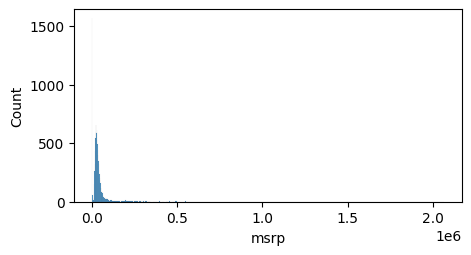

In [28]:
sns.histplot(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

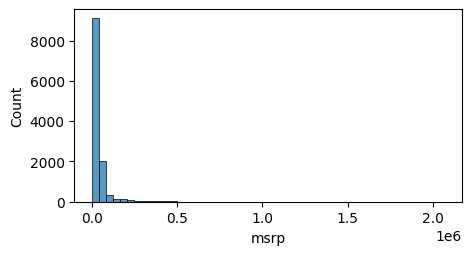

In [29]:
sns.histplot(df.msrp, bins = 50)

<Axes: xlabel='msrp', ylabel='Count'>

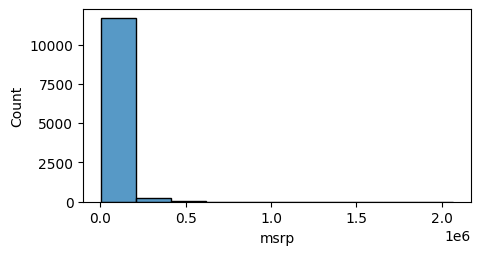

In [30]:
sns.histplot(df.msrp, bins = 10)

##### if we see the 50 bins graph, its basically a tail plot. So inorder to see more clearly, we filter

<Axes: xlabel='msrp', ylabel='Count'>

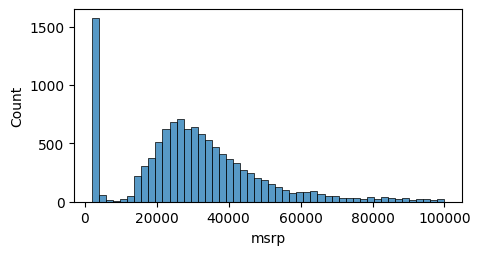

In [31]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)

This kind of distribution is not great for our model. the tail will confuse the > So we get rid of th etail by applying lgarithmic distribution

The command np.log([1, 10, 100, 100000]) uses NumPy (a Python library for numerical operations) to calculate the natural logarithm (logarithm with base e, where e is approximately 2.718) of each value in the list [1, 10, 100, 100000].

Now we might start from 0, but that will resut in an error since log 0 doesn't exist. SO to make sure we don't get that error, theres a programming practice to add 1 to each element [0+1, 1+1, 10=1..]

There is a built in function for that as wele

In [32]:
np.log1p([0, 1, 10, 100, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052, 11.51293546])

In [33]:
price_logs = np.log1p(df.msrp)

In [34]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

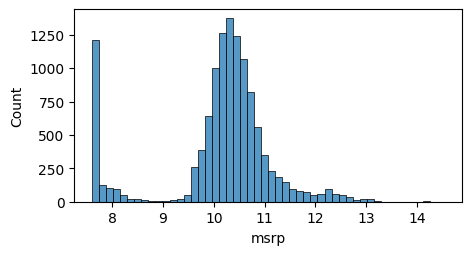

In [35]:
sns.histplot(price_logs, bins = 50)

Here, even though there is  a weird peak in the start, the rest of the graph is close to a normal distribution. Models tend to do really well with a normal distribution

### Handling Missing Values

In [36]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting up the validation framework

In [37]:
len(df)

11914

In [38]:
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = int(len(df)*0.6)

In [39]:
len(df), n_test+n_val+n_train

(11914, 11912)

So doing this, because of rounding, it doesn't add up.

So what we can do is take away testing and validation and leave the remaining for training


In [40]:
n = len(df)
n_train = n - (n_val+n_test)
n, n_test+n_train+n_val

(11914, 11914)

In [41]:
n_test, n_val, n_train

(2382, 2382, 7150)

### Splitting the dataset

In [42]:
df_test = df.iloc[: n_test]
df_val = df.iloc[n_test:n_test+n_val]
df_train = df.iloc[n_test+n_val:]

In [43]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4764,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,37800
4765,ford,flex,2017,premium_unleaded_(recommended),365.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,21,15,5657,43030
4766,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",large,wagon,22,16,5657,40180
4767,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,32730
4768,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,38230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


Theres a problem here though, all fords go in train datset. All bmw in validation and so on. So we need to shuffle them

In [44]:
np.arange(n)

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [45]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [46]:
df.iloc[:10]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [47]:
df.iloc[idx[:10]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
8001,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,22,873,17575
2882,bentley,continental_gtc,2013,premium_unleaded_(required),500.0,8.0,automatic,all_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,24,14,520,191400
649,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,32,21,3916,76100
616,maybach,57,2012,premium_unleaded_(required),543.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury",large,sedan,16,10,67,379050
4459,ford,f-150_heritage,2004,regular_unleaded,202.0,6.0,manual,four_wheel_drive,2.0,NaN,large,regular_cab_pickup,18,13,5657,26030


In [48]:
df_train= df.iloc[idx[: n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [49]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


we see even index is shuffled, to make it right

Now its all shuffled

In [50]:
df_train = df_train.reset_index(drop=True)


In [51]:
df_test = df_test.reset_index(drop = 'true')
df_val = df_val.reset_index(drop = 'true')

In [52]:
len(df_train), len(df_test), len(df_val)

(7150, 2382, 2382)

Transformation of msrp

In [53]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [54]:
np.log1p(df_train.msrp)

0        9.575747
1        9.887663
2        9.893235
3        7.601402
4       10.937757
          ...    
7145    10.913287
7146    10.282472
7147    10.453803
7148    12.622481
7149    10.540620
Name: msrp, Length: 7150, dtype: float64

In [55]:
np.log1p(df_train.msrp.values)  #getting the numpy array

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [56]:
y_train = np.log1p(df_train.msrp.values)  
y_val = np.log1p(df_val.msrp.values)  
y_test = np.log1p(df_test.msrp.values)  

Now we'll delete msrp column from the dataframe to avoid accidentally using it

In [57]:
del df_train['msrp']

In [58]:
del df_val['msrp']
del df_test['msrp']

In [59]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


## Linear Regression

https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/05-linear-regression-simple.md

In [60]:
w0 = 7.1
def linear_regression(xi):
    
    n = len(xi)
    
    pred = w0
    w = [0.01, 0.04, 0.002]
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [61]:
xi = [453, 11, 86]

In [62]:
linear_regression(xi)

12.241999999999999

We had taken log, we need to undo that so

In [63]:
np.exp(12.241)

np.float64(207108.89567788568)

In [64]:
np.exp(12.241)-1 #to undo the +1 we did inside

np.float64(207107.89567788568)

In [65]:
np.expm1(12.241)    #opposite of log1p

np.float64(207107.89567788568)

## Linear Regression: Vector Form

In [66]:
    w = [0.01, 0.04, 0.002]

In [67]:
def dot(xi, w):
    
    n = len(xi)
    
    res = 0.0

    for j in range(n):
        res = res + w[j] * xi[j]
    return res

In [68]:
def linear_regression(xi):
    xi = [1]+ xi
    return w0 + dot(xi,w)

Inorder to bring w0 in in the regression formula
we add w0 to the weight matrix and xi becomes [1,w1,w2....]

In [69]:
w_new = [w0] + w


In [70]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1,453, 11, 86]

X = [x1, x2, x10]   #we get list of lists

In [71]:
#to marixify it
X = np.array(X)

In [72]:
X.dot(w_new)

array([12.31 , 13.482, 12.242])

In [73]:
def linear_regression(X):
    return X.dot(w_new)

In [74]:
linear_regression(X)

array([12.31 , 13.482, 12.242])

Obtaining predictions as close as possible to 
y
 target values requires the calculation of weights from the general LR equation. The feature matrix does not have an inverse because it is not square, so it is required to obtain an approximate solution, which can be obtained using the Gram matrix (multiplication of feature matrix (
X
) and its transpose (
X
T
)). The vector of weights or coefficients 
w
 obtained with this formula is the closest possible solution to the LR system.

Normal Equation:

w
 = 
(
X
T
X
)
−
1
X
T
y

Where:

X
T
X
 is the Gram Matrix

 https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/07-linear-regression-training.md

 https://knowmledge.com/2023/09/21/ml-zoomcamp-2023-machine-learning-for-regression-part-6/

### Training a linear regression model

In [75]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)

In [76]:
XTX = X.T.dot(X)    #gram matrix

In [77]:
XTX_inv = np.linalg.inv(XTX)

In [78]:
XTX_inv.dot(XTX)

array([[ 1.00000000e+00, -1.71991760e-17, -1.88883497e-16],
       [ 2.68867062e-15,  1.00000000e+00, -6.66123481e-15],
       [-1.04425663e-17,  2.46735404e-18,  1.00000000e+00]])

In [79]:
XTX_inv.dot(XTX).round(1)

array([[ 1., -0., -0.],
       [ 0.,  1., -0.],
       [-0.,  0.,  1.]])

Its an identity matrix, alomost cos other values arre very small

Now we can implement the function train_linear_regression, that takes the feature matrix X and the target variable y and returns w0 and the vector w.

In [80]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]    #first term is w0, bias

In [81]:
X


array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   83],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [82]:
ones = np.ones(X.shape[0])

In [83]:
np.column_stack([ones, ones])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [84]:
X = np.column_stack([ones, X])

In [85]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.300e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [86]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]


In [87]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)

In [88]:
train_linear_regression(X,y)

(np.float64(30009.252922766562),
 array([ -22.78396914, -257.69087426,   -2.30322797]))

### Car price baseline model

In [89]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


We select all the columns with numeric value

In [90]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [91]:
base =['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity' ]
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [92]:
df_train[base].values

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [93]:
X_train = df_train[base].values

In [94]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [95]:
train_linear_regression(X_train, y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

We have nans here,because we have missing values

In [96]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [97]:
df_train[base].fillna(0)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [98]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [99]:
X_train = df_train[base].fillna(0).values

In [100]:
w0,w = train_linear_regression(X_train, y_train)

In [101]:
w0 , w

(np.float64(7.927257388069986),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [102]:
w0 + X_train.dot(w)

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

In [103]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

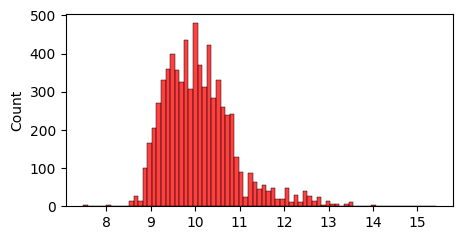

In [104]:
sns.histplot(y_pred, color = 'red')

<Axes: ylabel='Count'>

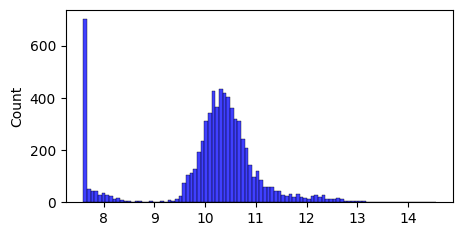

In [105]:
sns.histplot(y_train, color = 'blue')

<Axes: ylabel='Count'>

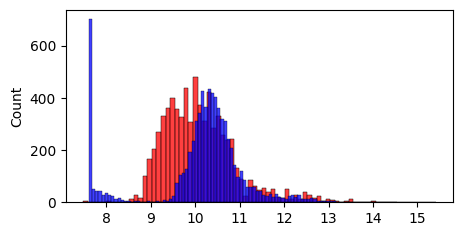

In [106]:
sns.histplot(y_pred, color = 'red')
sns.histplot(y_train, color = 'blue')

<Axes: ylabel='Count'>

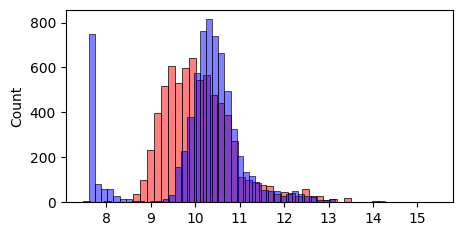

In [107]:
sns.histplot(y_pred, color = 'red',alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue',alpha = 0.5, bins = 50)   #alpha is for transparency

## RMSE

https://knowmledge.com/2023/09/22/ml-zoomcamp-2023-machine-learning-for-regression-part-8/

In [108]:
def rmse(y, y_pred):
    error = y-y_pred
    se = error ** 2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return rmse

In [109]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

## Validating the model

Evaluating the model performance on the training data does not really give a good indication of the real model performance. Since we don’t know how well the model can apply the learned knowledge to unseen data. So what we want to do now after training the model g on our training dataset, we want to apply it on the validation dataset to see how it performs on unseen data. We use RMSE for validating the performance.

In [110]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
 
X_train = df_train[base].fillna(0).values
 
w0, w = train_linear_regression(X_train, y_train)
 
y_pred = w0 + X_train.dot(w)

In [111]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [112]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val , y_pred)


np.float64(0.761653099130156)

## Simple Feature Engineering

In [113]:
def prepare_X(df):
    df = df.copy()  #so that function doesn't modify the dataframe we pass

    df['age'] = 2017 - df['year']
    features  =base + ['age']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [114]:
X_train = prepare_X(df_train)

In [115]:
X_train   # 6 cols ladt one is age

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

In [116]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val , y_pred)

np.float64(0.5172055461058299)

Model Improved. 

<Axes: ylabel='Count'>

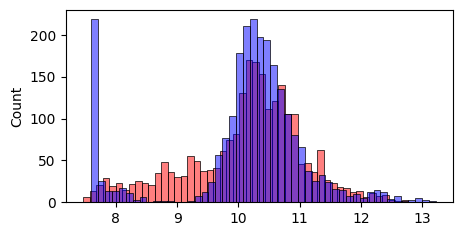

In [117]:
sns.histplot(y_pred, color = 'red',alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue',alpha = 0.5, bins = 50)   #alpha is for transparency

## Categorical Variables

Categorical variables are typically represented as strings, and pandas identifies them as object types. However, some variables that appear to be numerical may actually be categorical (e.g., the number of doors a car has). All these categorical variables need to be converted to a numerical form because ML models can interpret only numerical features. It is possible to incorporate certain categories from a feature, not necessarily all of them. This transformation from categorical to numerical variables is known as One-Hot encoding.

In [119]:
df_train.number_of_doors == 3


0       False
1       False
2       False
3        True
4       False
        ...  
7145    False
7146    False
7147    False
7148    False
7149    False
Name: number_of_doors, Length: 7150, dtype: bool

In [120]:
(df_train.number_of_doors == 3).astype('int')

0       0
1       0
2       0
3       1
4       0
       ..
7145    0
7146    0
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

In [121]:
 #With that replacement we can write a loop
#for v in [2, 3, 4]:
 #df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

In [133]:
df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype('int')
df_train['num_doors_3'] = (df_train.number_of_doors == 3).astype('int')
df_train['num_doors_4'] = (df_train.number_of_doors == 4).astype('int')

In [134]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [135]:
del df_train['num_doors_2']
del df_train['num_doors_3']
del df_train['num_doors_4']

In [136]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [137]:
def prepare_X(df):
    df = df.copy()  #so that function doesn't modify the dataframe we pass

    df['age'] = 2017 - df['year']
    features  =base + ['age']  #here we didnt do append because it would append column to base every time. If we wanna do append we can make a copy of base first as features and then do features.append

    for v in [2, 3, 4]:
        df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [139]:
def prepare_X(df):
    df = df.copy()
    
     
    df['age'] = 2017 - df.year
    features = base + ['age']
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [140]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])